# Trabalho Aplicações em Data Science 
### Titanic Dataset

In [1]:
# importar livrarias necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importar o ficheiro de treino para analisar
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variables
1. PassengerID - Id of passenger
2. Name - Passenger Name
3. Survived (0 = No, 1 = Yes)
4. Pclass - Ticket class (1 = 1st, 2 = 2nd and 3 = 3rd)
5. Sex (male, female)
6. Age - age in years
7. SibSp - # of siblings / spouses aboard the titanic
8. Parch - # of parentes / children aboard the titanic 
9. Ticket - ticket number
10. Fare - Passenger fare
11. Cabin - Cabin number
12. Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Categorical features: 
    Survived, Sex and Embarked.

#### Numerical features: 
    Continous: Age, Fare. Discrete: SibSp, Parch e Pclass.

### Insights básicos do dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Através do df. info() observamos que o dataset de treino tem 891 linhas, 11 variáveis incluindo o target (survived). Duas variáveis são floats (Age and Fare), 5 são objects (Name, Sex, Ticket, Cabin and Embarked) e 5 são integers (PassagerId, Surived, Pclass, SibSp and Parch).

In [4]:
# missing values presentes no dataset de treino
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Percentagem de missing values presentes no dataset de treino
missing_values = df.isnull().mean()
missing_values.sort_values(ascending=False).map(lambda x: f"{x:.1%}")

Cabin          77.1%
Age            19.9%
Embarked        0.2%
PassengerId     0.0%
Survived        0.0%
Pclass          0.0%
Name            0.0%
Sex             0.0%
SibSp           0.0%
Parch           0.0%
Ticket          0.0%
Fare            0.0%
dtype: object

Observando os valores em falta observamos que 3 das 11 variáveis têm valores em falta. A variável 'Cabin' é a que tem uma maior percentagem, 77%, de valores em falta. Pelo que após análise mais detalhada, esta coluna pode ter de vir a ser removida do dataset. Seguida da variável 'Age' com aproximadamente 20% dos valores em falta que corresponde a 177 valores em falta. A variável 'Embarked' tem apenas 2 valores em falta que corresponde a 0.22% dos valores totais do dataset, pelo que estes podem ser preenchidos ou a linha pode ser removida.

In [6]:
# Verificar se existem dados duplicados na coluna 'Name'
df['Name'].duplicated().sum()

0

In [7]:
# Verificar se existem dados duplicados nas outras colunas do dataset
df.drop(columns = 'PassengerId').duplicated().sum()

0

### Análise Exploratória dos Dados (EDA)
A análise exploratória dos dados é um processo crítico para fazer as investigações iniciais aos dados, permite descobrir anomalias, correlações entre os dados e testar diferentes hipóteses com a ajuda de ferramentas estatísticas e representações gráficas.  

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Através da função .describe() podemos observar as tendência central dos dados numéricos. Aproximadamente 38% do dataset sobreviveu à tragédia do Titanic. Relativamente à idade, temos uma gama que vai de 0.42 a 80 anos (valor mínimo e máximo, respectivamente). Observando o desvio padrão da variável 'Fare', podemos estar perante um outlier, pois este tem um valor bastante elevado (~50). A média desta variável é de 32.2 mas se olharmos para a mediana (quartil 50%) esta apresenta um valor de 14.5.

In [9]:
# Análise da variável target ('survived')
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

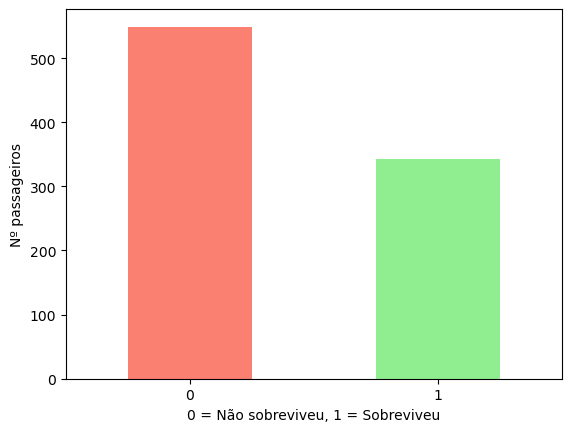

In [10]:
# Gráfico dos casos survived/not survived (target variable)
df["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightgreen"])

plt.xlabel("0 = Não sobreviveu, 1 = Sobreviveu")
plt.ylabel("Nº passageiros")
plt.xticks(rotation=0);

plt.show();

In [11]:
percentage = df["Survived"].value_counts(normalize = True) * 100
percentage

0    61.616162
1    38.383838
Name: Survived, dtype: float64

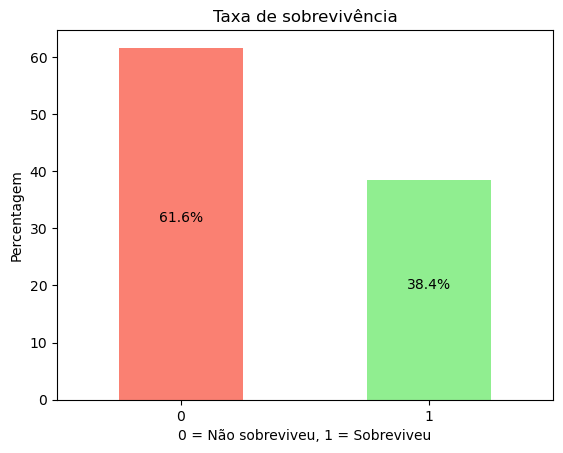

In [12]:
ax = percentage.plot(kind="bar", color=["salmon", "lightgreen"])

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black', padding=4)
    
plt.title("Taxa de sobrevivência")
plt.xlabel("0 = Não sobreviveu, 1 = Sobreviveu")
plt.ylabel("Percentagem")
plt.xticks(rotation=0);

Podemos observar através dos gráficos anteriores que a maioria das pessoas não sobreviveu à tragédia.

<AxesSubplot:>

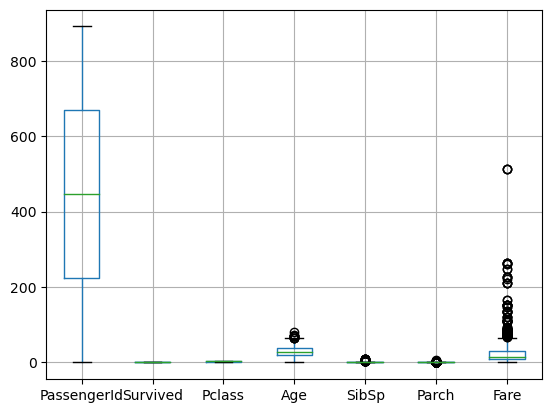

In [13]:
# representação gráfica dos possíveis outliers
df.boxplot()

As variáveis em que poderemos ter possíveis outliers são a variável 'Age' e a variável 'Fare'. Vamos analisar estas duas mais detalhadamente.

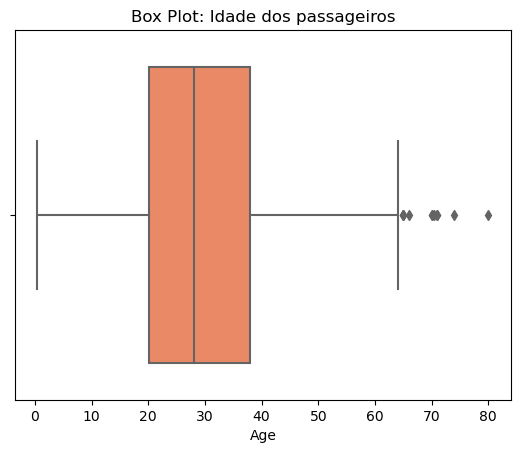

In [14]:
# Representação gráfica da variável 'Age'
sns.boxplot(x='Age', data=df, color ='coral')
plt.xlabel('Age')
plt.title('Box Plot: Idade dos passageiros')
plt.show();

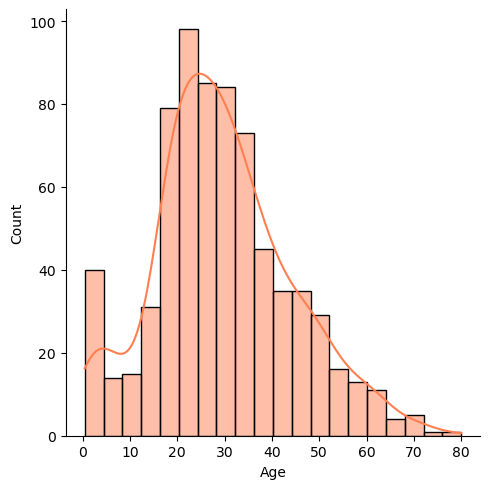

In [15]:
# Distribuição da coluna 'Age'
sns.displot(data=df, x='Age', bins = 20, kde=True, color = 'coral')

Para a variável 'Age' os valores mais elevados podem não ser outliers visto que se encontram dentro de um range aceitável de idade (até aos 80 anos) e que temos um maior número de passageiros entre os 20 e 35 anos, podendo afetar a distribuição para valores extremos. A distribuição é ligeiramente assimétrica com cauda à direita.

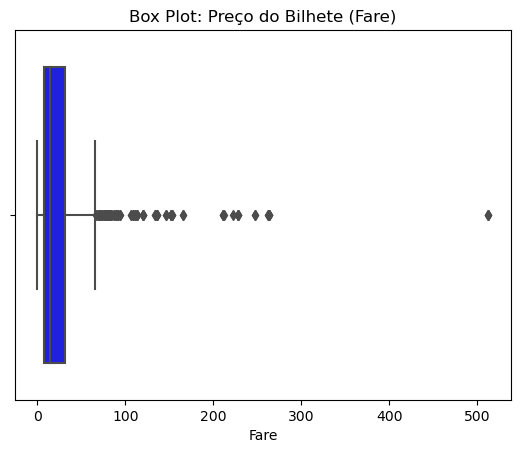

In [16]:
# Boxplot da Variável'Fare'
sns.boxplot(x='Fare', data=df, color = 'blue')
plt.xlabel('Fare')
plt.title('Box Plot: Preço do Bilhete (Fare)')
plt.show();

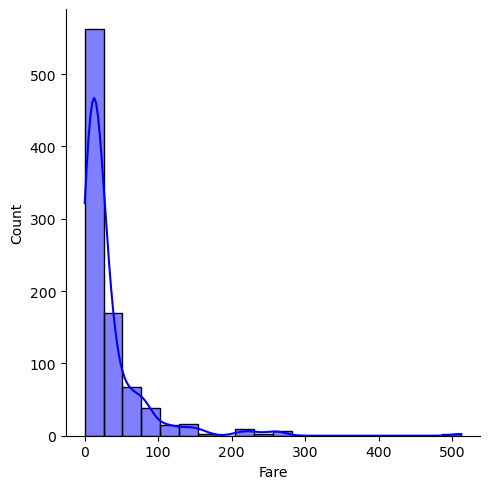

In [17]:
# Distribuição da coluna 'Fare'
sns.displot(data=df, x='Fare', bins = 20, kde=True, color = 'blue')

Observando a boxplot criado para a variável 'Fare' e a distribuição desta variável observamos que podemos ter possíveis outliers nesta variável. Temos um valor máximo de aproximadamente 512, sendo que este valor é o valor mais discrepante que temos presente no dataset de treino para esta variável. Observamos também que temos uma distribuição assimétrica com cauda à direita.

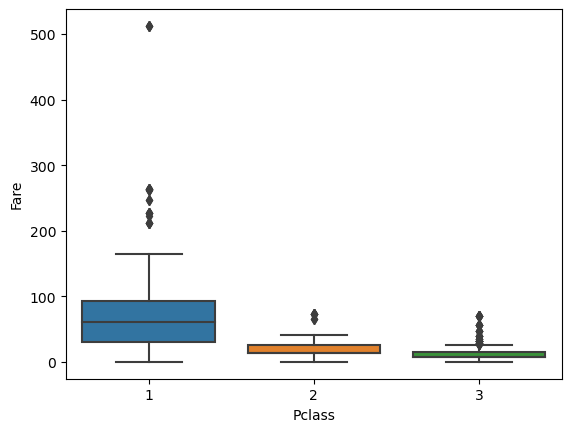

In [18]:
# representação gráfica do preço do bilhete de acordo com a classe
sns.boxplot(y='Fare',x='Pclass', data=df);

Através do gráfico anterior observamos que os valores máximos da variável 'Fare' correspondem a passageiros que estão em primeira classe. Pelo que estes bilhetes podem fazer parte de cabines exclusivas, para executivos por exemplo, o que leva a que estes valores não sejam considerados outliers.

# Binning 
O binning também conhecido como discretização, é uma técnica utilizada no pré-processamento de dados utilizada para transformar variáveis contínuas em intervalos.
O principal motivo de realizar binning é para fazer o modelo mais robusto e para prevenir overfitting, apesar deste por vezes influenciar a performance do modelo.

Variáveis nas quais podemos aplicar binning: 'Fare' e 'Age'

Podemos usar binning para agrupar os dados em diversas categorias, por exemplo, na variável 'Age' podemos dividir em crianças, adolescentes, adultos e idosos. Como a variável 'Age' apresenta missing values vamos primeiro fazer binning da variável 'Fare' e só depois de substituir os valores da variável 'Age' é que aplicamos o binning.

Relativamente à variável 'Fare' vamos dividir em 4 conjuntos de dados ('Até 15$, 15-50$, 50-150$, Acima de 150$).

In [19]:
df['interval_fare'] = pd.cut(df['Fare'], bins=[-1, 15, 50, 150, 513], labels = ['Até 15$', '15-50$', '50-150$', 'Acima de 150§'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,interval_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Até 15$
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,50-150$
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Até 15$
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50-150$
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Até 15$


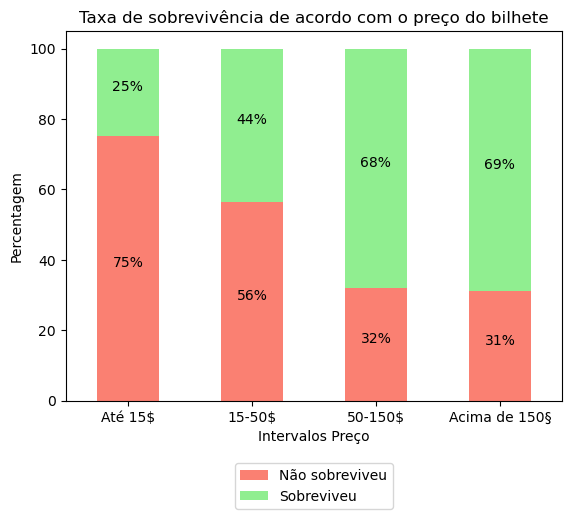

In [20]:
# Representação gráfica das percentagens de passageiros que sobrebiveram/não sobreviveram de acordo com os diferentes preços pagos pelo bilhete
percentage_fare_intervals = pd.crosstab(df['interval_fare'], df['Survived'], normalize='index') * 100

ax = percentage_fare_intervals.plot.bar(stacked = True, color = ['salmon', 'lightgreen'])
plt.title("Taxa de sobrevivência de acordo com o preço do bilhete")
plt.xticks(rotation = 0)
plt.xlabel("Intervalos Preço")
plt.ylabel("Percentagem")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=10, color='black', padding=4)

bbox_to_anchor=(0.5, -0.15)
ax.legend(['Não sobreviveu', 'Sobreviveu'], loc='upper center', bbox_to_anchor=bbox_to_anchor)
plt.show();

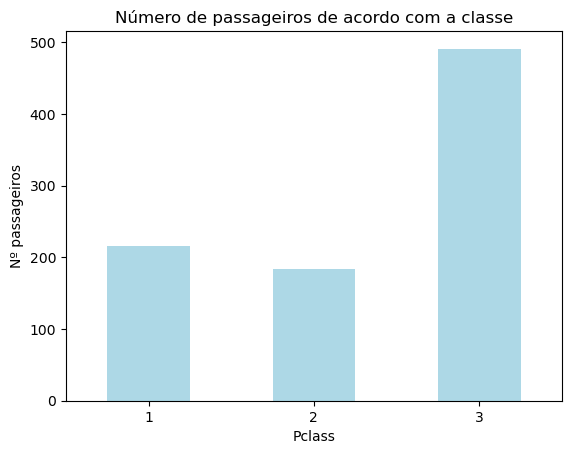

In [21]:
### Análise das restantes variáveis 
# Gráfico da variável Pclass
df["Pclass"].value_counts().sort_index(ascending = True).plot(kind="bar", color=["lightblue"])

plt.title("Número de passageiros de acordo com a classe")
plt.xlabel("Pclass")
plt.ylabel("Nº passageiros")
plt.xticks(rotation=0);

Observamos através do gráfico que a maioria dos passageiros que iam a bordo no navio, tinham bilhetes de terceira classe.

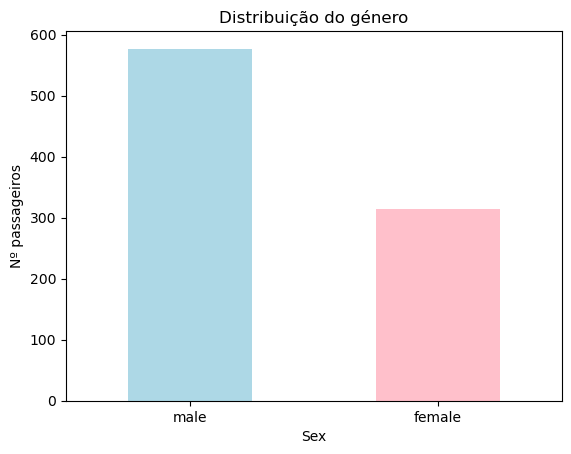

In [22]:
# Gráfico da variável 'Sex'
df["Sex"].value_counts().plot(kind="bar", color=["lightblue", "pink"])

plt.title("Distribuição do género")
plt.xlabel("Sex")
plt.ylabel("Nº passageiros")
plt.xticks(rotation=0);

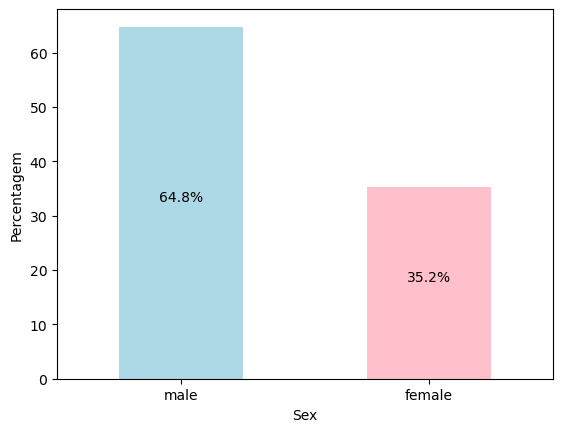

In [23]:
# Gráfico da percentagem de passageiros de cada género a bordo do Titanic
sex_percentage = df["Sex"].value_counts(normalize = True) * 100
ax = sex_percentage.plot(kind="bar", color=["lightblue", "pink"])


for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black', padding=4)
    
plt.xlabel("Sex")
plt.ylabel("Percentagem")
plt.xticks(rotation=0);

A bordo iam mais passageiros do sexo masculino do que do sexo feminino, quase o dobro.

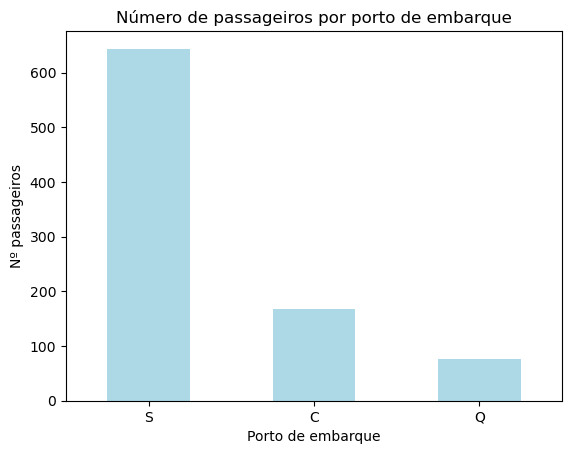

In [24]:
# Representação gráfica do número de passageiros que embarcaram em cada porto de embarque
df["Embarked"].value_counts().plot(kind="bar", color=["lightblue"])

plt.title("Número de passageiros por porto de embarque")
plt.xlabel("Porto de embarque")
plt.ylabel("Nº passageiros")
plt.xticks(rotation=0);

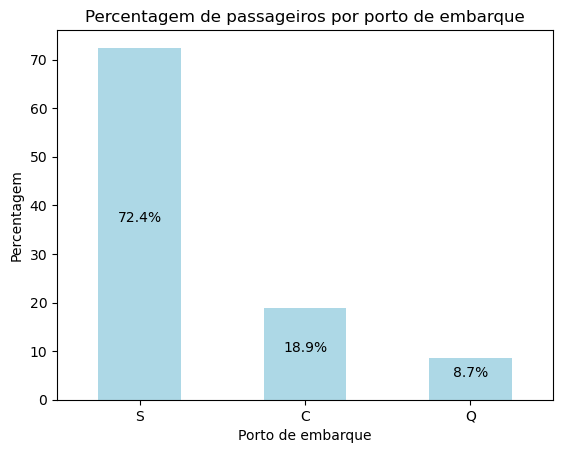

In [25]:
# Representação gráfica da percentagem de passageiros que embarcaram em cada porto de embarque
embarked_percentage = df["Embarked"].value_counts(normalize = True) * 100
ax = embarked_percentage.plot(kind="bar", color=["lightblue"])


for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black', padding=4)
    
plt.title("Percentagem de passageiros por porto de embarque")
plt.xlabel("Porto de embarque")
plt.ylabel("Percentagem")
plt.xticks(rotation=0);

A maioria dos passageiros embarcaram no porto de embarque de Southampton (S), 72.4%. O Porto de embarque onde embarcaram menos pessoas foi no de Queenstown (Q). 

In [26]:
#Comparar a variável target (survived) com o género (feminino/masculino)
survived_by_sex = pd.crosstab(df.Survived, df.Sex)

survived_by_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


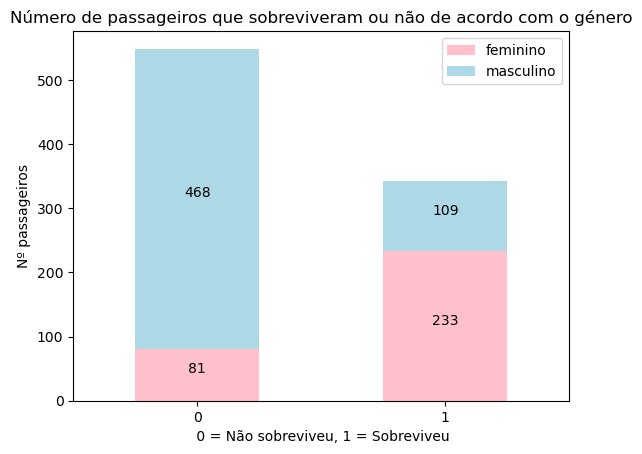

In [27]:
# Representação gráfica 'Survived/Not Survived according to Sex'
ax = survived_by_sex.plot.bar(stacked = True, color = ['pink', 'lightblue'])
plt.title("Número de passageiros que sobreviveram ou não de acordo com o género")
plt.xticks(rotation = 0)
plt.legend(["feminino", "masculino"])
plt.xlabel(" 0 = Não sobreviveu, 1 = Sobreviveu")
plt.ylabel("Nº passageiros")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='black', padding=4)
    
plt.show();

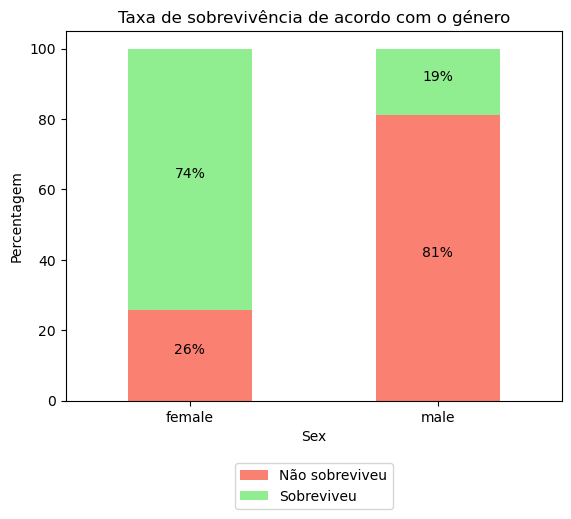

In [28]:
# Representação gráfica da percentagem de passageiros de cada género que sobreviveram/não sobreviveram
survived_by_sex_percentage = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
survived_by_sex_percentage

ax = survived_by_sex_percentage.plot.bar(stacked = True, color = ['salmon', 'lightgreen'])
plt.title("Taxa de sobrevivência de acordo com o género")
plt.xticks(rotation = 0)
plt.legend(["feminino", "masculino"])
plt.ylabel("Percentagem")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=10, color='black', padding=4)

bbox_to_anchor=(0.5, -0.15)
ax.legend(['Não sobreviveu', 'Sobreviveu'], loc='upper center', bbox_to_anchor=bbox_to_anchor)
plt.show();

Comparando ambos os géneros, observamos que é mais provável que as mulheres sobrevivam, pois 74% dos sobreviventes foram mulheres enquanto apenas 19% dos homens sobreviveram.

In [29]:
# Calcular o número de passageiros que sobreviveram consoante o tipo de bilhete
survived_by_class = pd.crosstab(df.Pclass, df.Survived)

survived_by_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


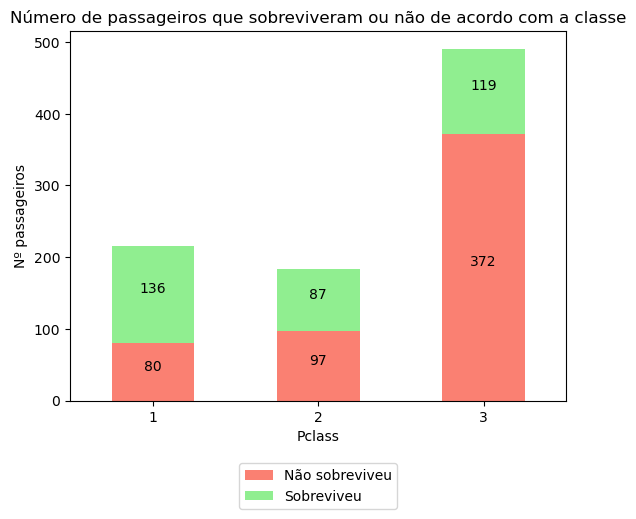

In [30]:
#Representação gráfica do número de passageiros que sobreviveram de acordo com o tipo de bilhete
ax = survived_by_class.plot.bar(stacked = True, color = ['salmon', 'lightgreen'])
plt.title("Número de passageiros que sobreviveram ou não de acordo com a classe")
plt.xticks(rotation = 0)
plt.xlabel("Pclass")
plt.ylabel("Nº passageiros")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='black', padding=4)

bbox_to_anchor = (1.05, 0.6)
ax.legend(['Não sobreviveu', 'Sobreviveu'], loc='upper center', bbox_to_anchor=(0.5, -0.15))

plt.show();

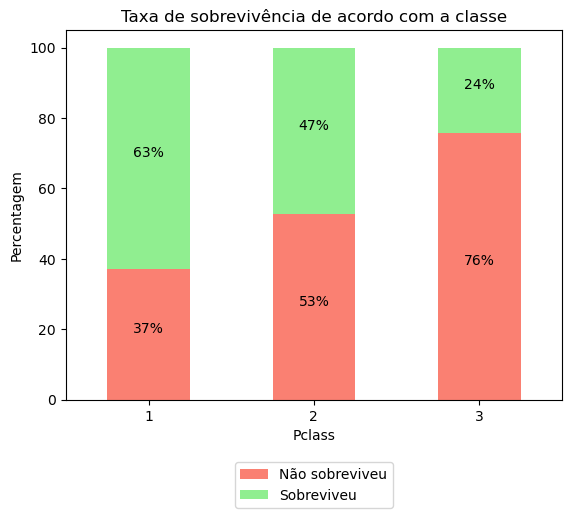

In [31]:
# Transformar em percentagem
survived_by_class_percentage = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100

#Representação gráfica da percentagem de passageiros que sobreviveram de acordo com o tipo de bilhete
ax = survived_by_class_percentage.plot.bar(stacked = True, color = ['salmon', 'lightgreen'])
plt.title("Taxa de sobrevivência de acordo com a classe")
plt.xticks(rotation = 0)
plt.xlabel("Pclass")
plt.ylabel("Percentagem")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=10, color='black', padding=4)

ax.legend(['Não sobreviveu', 'Sobreviveu'], loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show();

In [32]:
# Calcular o número de passageiros que sobreviveram consoante o tipo de bilhete e o género
survived_by_class_sex = df.groupby(['Pclass', 'Sex'])['Survived'].count().unstack()

survived_by_class_sex

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


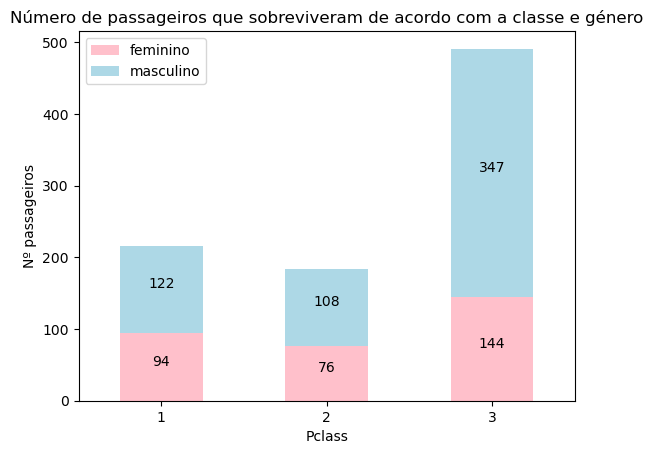

In [33]:
# Representação gráfica do número de passageiros que sobreviveram consoante o tipo de bilhete 'Pclass' e o género 'Sex'
ax = survived_by_class_sex.plot.bar(stacked = True, color = ['pink', 'lightblue'])
plt.title("Número de passageiros que sobreviveram de acordo com a classe e género")
plt.legend(["feminino", "masculino"])
plt.xticks(rotation = 0)
plt.xlabel("Pclass")
plt.ylabel("Nº passageiros")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='black', padding=4)

plt.show();

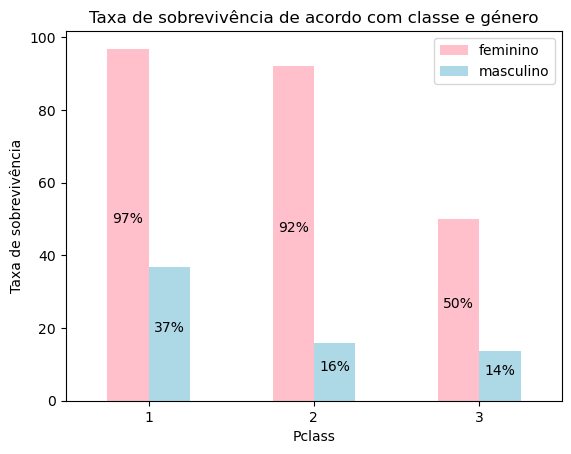

In [34]:
# Calcular a percentagem de passageiros que sobreviveram consoante o tipo de bilhete e o género
class_sex_percentage = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack() * 100

# Representação gráfica da percentagem de passageiros que sobreviveram consoante o tipo de bilhete 'Pclass' e o género 'Sex'
ax = class_sex_percentage.plot.bar(color = ['pink', 'lightblue'])
plt.title("Taxa de sobrevivência de acordo com classe e género")
plt.legend(["feminino", "masculino"])
plt.xticks(rotation = 0)
plt.xlabel("Pclass")
plt.ylabel("Taxa de sobrevivência")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=10, color='black', padding=4)

plt.show();

Podemos observar que temos uma maior percentagem de mulheres a sobreviver em todas as classes.

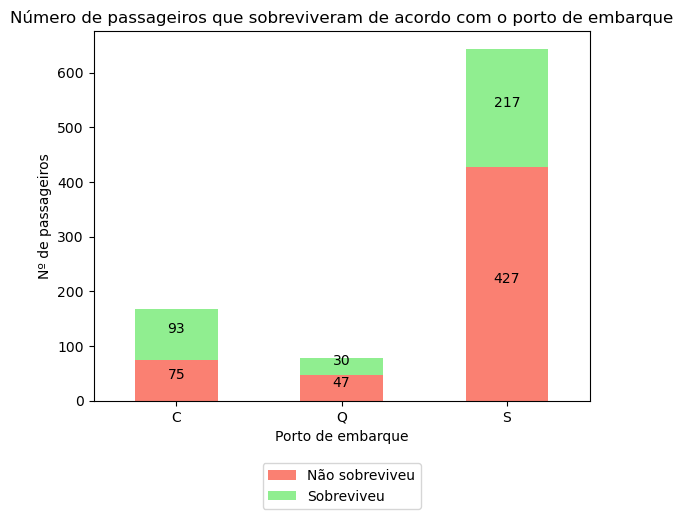

In [35]:
# Determinar o número de passageiros que sobreviveram de acordo com o porto de embarque
survived_embarked = pd.crosstab(df.Embarked, df.Survived)

#Representação gráfica do númmero de passageiros que sobreviveram de acordo com o porto de embarque
ax = survived_embarked.plot.bar(stacked = True, color = ['salmon', 'lightgreen'])
plt.title("Número de passageiros que sobreviveram de acordo com o porto de embarque")
plt.xticks(rotation = 0)
plt.xlabel("Porto de embarque")
plt.ylabel("Nº de passageiros")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='black', padding=4)

bbox_to_anchor=(0.5, -0.15)
ax.legend(['Não sobreviveu', 'Sobreviveu'], loc='upper center', bbox_to_anchor=bbox_to_anchor)
plt.show();

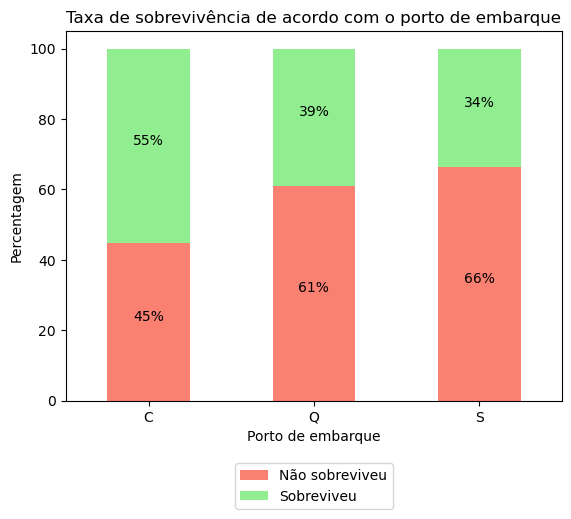

In [36]:
# Transformar em percentagem
survived_embarked_percentage = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100

#Representação gráfica da percentagem de passageiros que sobreviveram de acordo com o porto de embarque
ax = survived_embarked_percentage.plot.bar(stacked = True, color = ['salmon', 'lightgreen'])
plt.title("Taxa de sobrevivência de acordo com o porto de embarque")
plt.xticks(rotation = 0)
plt.xlabel("Porto de embarque")
plt.ylabel("Percentagem")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=10, color='black', padding=4)

bbox_to_anchor=(0.5, -0.15)
ax.legend(['Não sobreviveu', 'Sobreviveu'], loc='upper center', bbox_to_anchor=bbox_to_anchor)
plt.show();

In [37]:
# Construção de uma pivot_table com as variáveis Age, SibSp, Parch and Fare

pivot_table = df.pivot_table(values = ['Age','SibSp', 'Parch', 'Fare'], index ='Survived', aggfunc='mean')
pivot_table

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Através da tabela construída podemos observar que as pessoas mais novas tendem a sobreviver; Os passageiros que pagam mais pelo bilhete (Fare) apresentam uma maior probabilidade de sobreviver à tragédia. Os passageiros que viajam com os seus pais/filhos têm uma maior change de sobreviver. Enquanto que se tiverem irmãos/cônjuges a bordo têm uma maior probabilidade de não sobreviver.

In [38]:
# Análise da variável 'SibSp' 
sib_survived = df.groupby('SibSp')['Survived'].mean().sort_index()
sib_survived

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

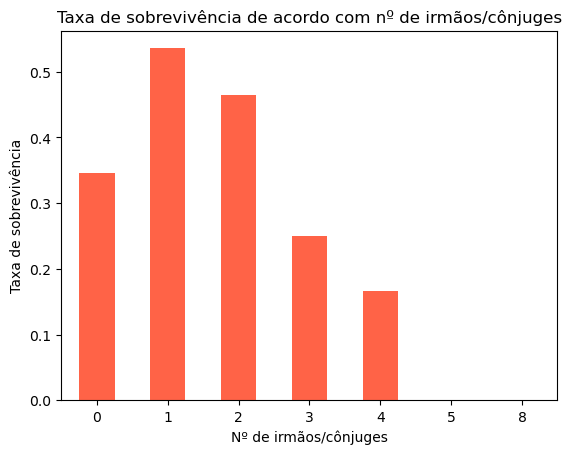

In [39]:
# Representação gráfica da variável 'SibSp'
sib_survived.plot(kind="bar", color = 'tomato')

plt.title("Taxa de sobrevivência de acordo com nº de irmãos/cônjuges")
plt.xlabel("Nº de irmãos/cônjuges")
plt.ylabel("Taxa de sobrevivência")
plt.xticks(rotation=0);

In [40]:
# Análise da variável 'Parch'
parch_survived = df.groupby('Parch')['Survived'].mean().sort_index()
parch_survived

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

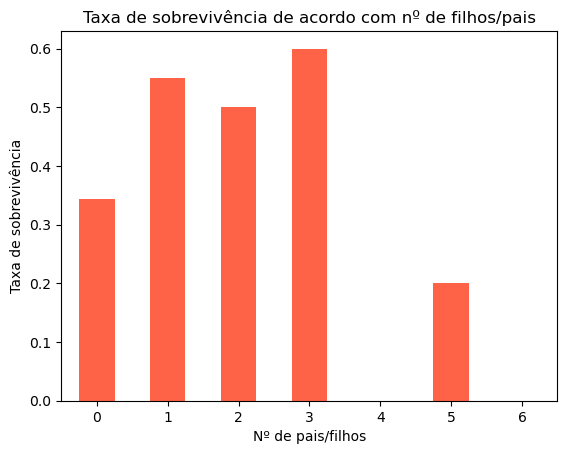

In [41]:
# Representação gráfica da variável 'Parch'
parch_survived.plot(kind="bar", color = 'tomato')

plt.title("Taxa de sobrevivência de acordo com nº de filhos/pais")
plt.xlabel("Nº de pais/filhos")
plt.ylabel("Taxa de sobrevivência")
plt.xticks(rotation=0);

Observando estas duas últimas variáveis 'SibSp' e 'Parch' observamos que passageiros com 1 a 3 filhos ou pais apresentam uma maior probabilidade de sobreviver, sendo que com mais de 3 essa probabilidade diminui. Passageiros com 3 ou mais irmãos/cônjuges a bordo apresentam uma menor taxa de sobrevivência.

### Feature Engineering 

Podemos criar uma nova variável por forma a melhorar a classificação final do nosso modelo.
Vamos criar então uma nova variável com o tamanho da família 'FamSize' somando as variáveis 'SibSp' e 'Parch'.

In [42]:
# Calcular o tamanho de cada família
df['FamSize'] = df["SibSp"] + df["Parch"] + 1
df['FamSize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamSize, dtype: int64

Observando a nova coluna: 537 passageiros viajam sozinhos. Os passageiros têm mais tendência para viajar com grupos menores do que com grupos maiores.

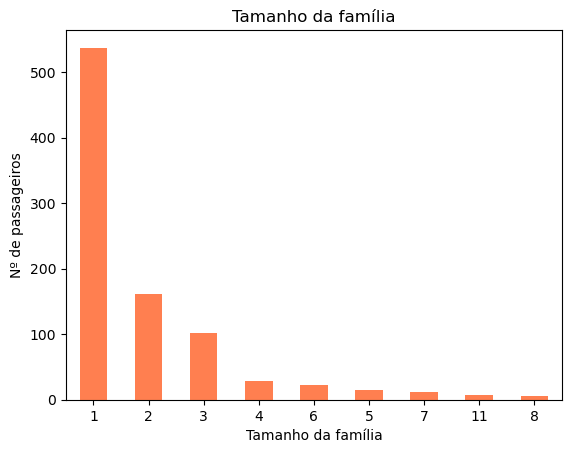

In [43]:
famsize = df['FamSize'].value_counts()

famsize.plot.bar(color = 'coral')

plt.title("Tamanho da família")
plt.xticks(rotation = 0)
plt.xlabel("Tamanho da família")
plt.ylabel("Nº de passageiros")

plt.show();

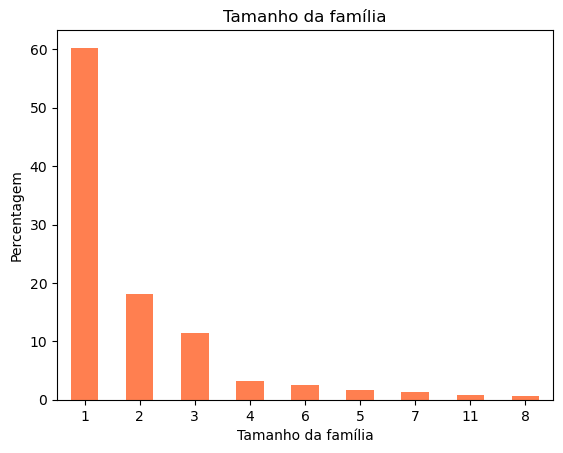

In [44]:
famsize_perc = df['FamSize'].value_counts(normalize = True) * 100

famsize_perc.plot.bar(color = 'coral')

plt.title("Tamanho da família")
plt.xticks(rotation = 0)
plt.xlabel("Tamanho da família")
plt.ylabel("Percentagem")

plt.show();

É possível observar que uma maior percentagem de passageiros viaja sozinho e é mais provável que os passageiros viajem em grupos de 2 e 3 pessoas do que viajem em grupos com mais de 4 pessoas.

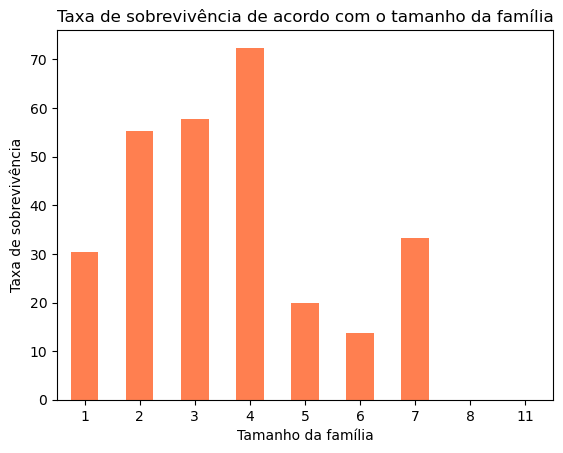

In [45]:
# Percentagem de passageiros que sobreviveram de acordo com o tamanho da família

famsize_sur_perc = df.groupby('FamSize')['Survived'].mean() * 100

famsize_sur_perc.plot.bar(color = 'coral')
plt.title("Taxa de sobrevivência de acordo com o tamanho da família")
plt.xticks(rotation = 0)
plt.xlabel("Tamanho da família")
plt.ylabel("Taxa de sobrevivência")

plt.show();

Passageiros que viajam em grupos de 4, 3 e 2 pessoas, respetivamente, têm uma maior probabilidade de sobreviver do que passageiros que viajem sozinhos ou em grupos maiores. 

In [46]:
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [47]:
titles = ['Ms', 'Mlle', 'Mme']

df[df['Title'].isin(titles)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,interval_fare,FamSize,Title
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,50-150$,1,Mme
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,Até 15$,1,Ms
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,50-150$,1,Mlle
710,711,1,1,"Mayne, Mlle. Berthe Antonine (Mrs de Villiers)",female,24.0,0,0,PC 17482,49.5042,C90,C,15-50$,1,Mlle


Os títulos 'Ms', 'Mlle' e 'Mme' correspodem a mulheres que viajam sozinhas a rondar os 24 e 28 anos, pelo que podem ter o título de 'Miss'.

In [48]:
# Substituir os títulos anteriores por 'Miss' e os títulos com menos de 10 passageiros vamos alocar a outros.

df.loc[df['Title'].isin(['Ms', 'Mlle', 'Mme']), 'Title'] = 'Miss'
df.loc[df['Title'].isin(['Dr', 'Rev', 'Major', 'Col', 'the Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer']), 'Title'] = 'Other'

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,interval_fare,FamSize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Até 15$,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,50-150$,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Até 15$,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50-150$,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Até 15$,1,Mr


In [49]:
# Verificar se as substituições foram efetuadas
df['Title'].value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Other      23
Name: Title, dtype: int64

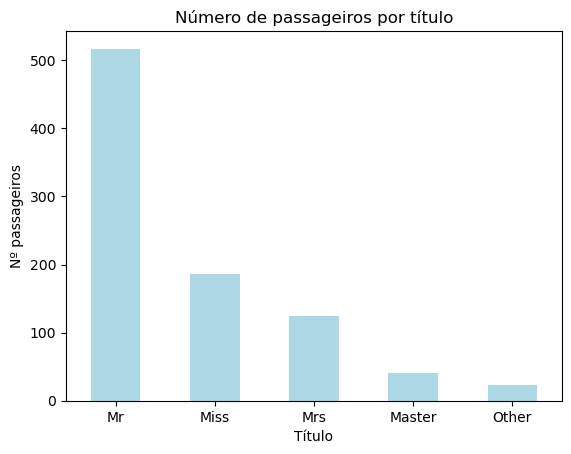

In [50]:
# Representação gráfica do número de passageiros por título
df["Title"].value_counts().plot(kind="bar", color=["lightblue"])

plt.title("Número de passageiros por título")
plt.xlabel("Título")
plt.ylabel("Nº passageiros")
plt.xticks(rotation=0);

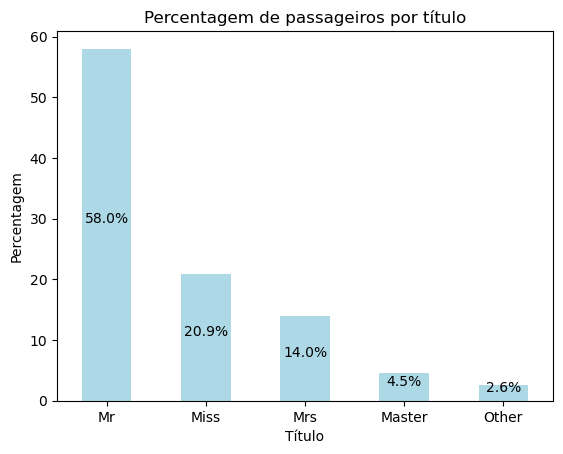

In [51]:
# Representação gráfica da percentagem de passageiros por título
title_percentage = df["Title"].value_counts(normalize = True) * 100
ax = title_percentage.plot(kind="bar", color=["lightblue"])

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black', padding=4)
    
plt.title("Percentagem de passageiros por título")
plt.xlabel("Título")
plt.ylabel("Percentagem")
plt.xticks(rotation=0);

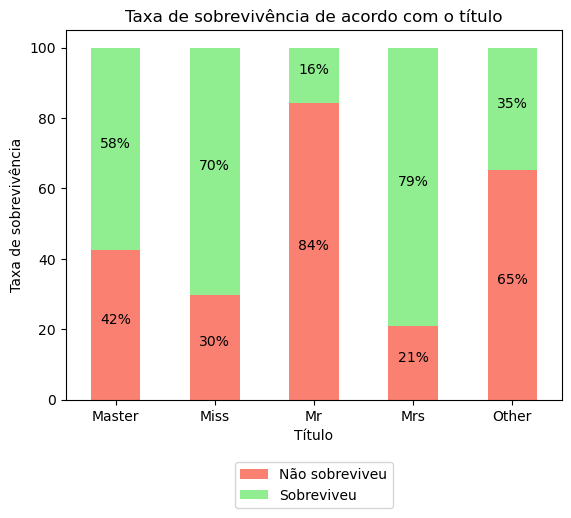

In [52]:
#Representação gráfica da percentagem de passageiros que sobreviveram de acordo com o título
survived_title_percentage = pd.crosstab(df['Title'], df['Survived'], normalize='index') * 100

ax = survived_title_percentage.plot.bar(stacked = True, color = ['salmon', 'lightgreen'])
plt.title("Taxa de sobrevivência de acordo com o título")
plt.xticks(rotation = 0)
plt.xlabel("Título")
plt.ylabel("Taxa de sobrevivência")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=10, color='black', padding=4)

bbox_to_anchor=(0.5, -0.15)
ax.legend(['Não sobreviveu', 'Sobreviveu'], loc='upper center', bbox_to_anchor=bbox_to_anchor)
plt.show();

In [53]:
# Para os missing values da variável Age podemos confirmar os títulos dos passageiros agrupando essas duas variáveis

missing_values_age_by_title = df.groupby('Title')['Age'].apply(lambda x: x.isnull().sum())
missing_values_age_by_title

Title
Master      4
Miss       36
Mr        119
Mrs        17
Other       1
Name: Age, dtype: int64

Vemos que temos 4 crianças/adolescentes no qual falta a idade, 36 valores correspondentes ao título 'Miss', entre outros, podemos então fazer a média ou mediana da idade de cada um desses títulos e substituir os valores em falta por esses valores em vez de fazer a média/mediana de todo o dataset e substituir pela média/mediana do dataset total.

Acima observamos que podemos ter possíveis outliers no nosso conjunto de dados de treino, como a mediana é menos afetados por valores extremos, esta é a melhor opção neste caso. Vamos então utilizar a mediana.

Vamos então construir um dicionário com esses dados:

In [54]:
median_title_age = dict(df.groupby('Title').median()['Age'])
median_title_age

{'Master': 3.5, 'Miss': 21.5, 'Mr': 30.0, 'Mrs': 35.0, 'Other': 48.5}

In [55]:
df.loc[df['Age'].isnull(), 'Age'] = df.loc[df['Age'].isnull(), 'Title'].map(median_title_age)
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
interval_fare      0
FamSize            0
Title              0
dtype: int64

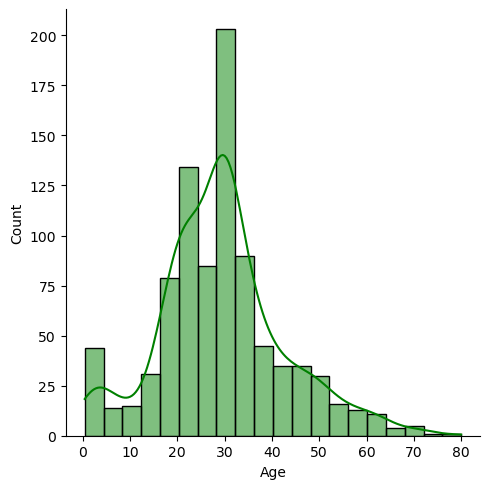

In [56]:
# Distribuição da coluna 'Age' após a substituição dos valores pela mediana 
sns.displot(data=df, x='Age', bins = 20, kde=True, color = 'green')

In [57]:
### Binning da variável 'Age' 

# Dividir a variável 'age' em 4 grupos diferentes para facilitar a visualização 
df['age_groups'] = pd.cut(df['Age'], bins=[0,9,18,60,100], labels=["Child","Teen","Adult", "Senior"])

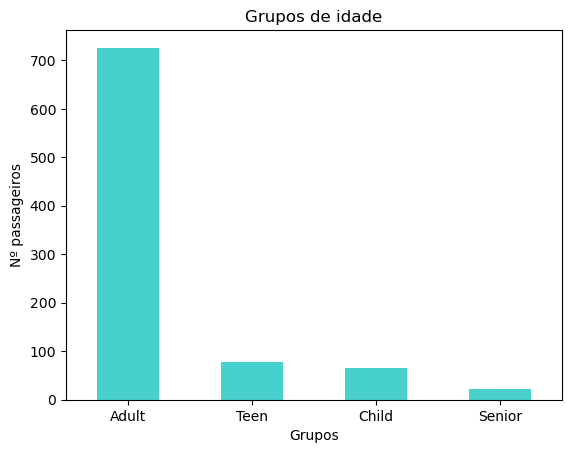

In [58]:
# Representação gráfica da nova variável 'age_groups'
df["age_groups"].value_counts().plot(kind="bar", color = 'mediumturquoise')

plt.title("Grupos de idade")
plt.xlabel("Grupos")
plt.ylabel("Nº passageiros")
plt.xticks(rotation=0);

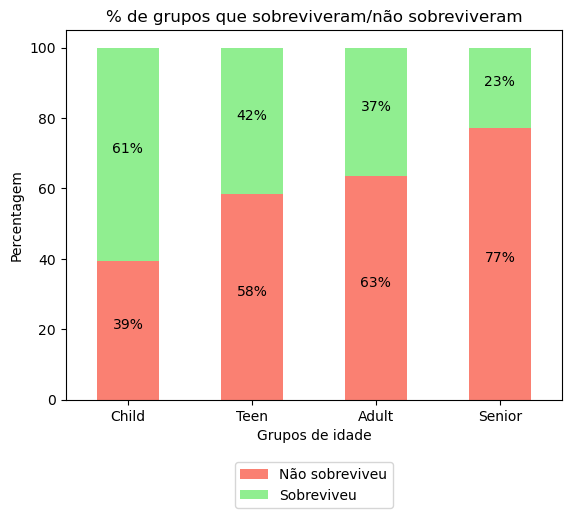

In [59]:
# Representação gráfica das percentagens de passageiros que sobreviveram/não sobreviveram de acordo com os diferentes grupos de idade
percentage_age_groups = pd.crosstab(df['age_groups'], df['Survived'], normalize='index') * 100

ax = percentage_age_groups.plot.bar(stacked = True, color = ['salmon', 'lightgreen'])
plt.title("% de grupos que sobreviveram/não sobreviveram")
plt.xticks(rotation = 0)
plt.xlabel("Grupos de idade")
plt.ylabel("Percentagem")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=10, color='black', padding=4)

bbox_to_anchor=(0.5, -0.15)
ax.legend(['Não sobreviveu', 'Sobreviveu'], loc='upper center', bbox_to_anchor=bbox_to_anchor)
plt.show();

In [60]:
# Remover a coluna 'Cabin' pois esta tem 77% de valores em falta

df.drop(columns=['Cabin'], inplace=True)

In [61]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
interval_fare    0
FamSize          0
Title            0
age_groups       0
dtype: int64

In [62]:
# Calcular a moda (valor mais comum) para preencher a coluna 'Embarked' 
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [63]:
### A cidade mais comum é a S: Southampton
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [64]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
interval_fare    0
FamSize          0
Title            0
age_groups       0
dtype: int64

In [65]:
# Remover colunas que não nos dão informação para prever que passageiros sobrevivem à tragédia
df.drop(columns=['Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch'], inplace=True)

In [66]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,interval_fare,FamSize,Title,age_groups
0,0,3,male,22.0,7.2500,S,Até 15$,2,Mr,Adult
1,1,1,female,38.0,71.2833,C,50-150$,2,Mrs,Adult
2,1,3,female,26.0,7.9250,S,Até 15$,1,Miss,Adult
3,1,1,female,35.0,53.1000,S,50-150$,2,Mrs,Adult
4,0,3,male,35.0,8.0500,S,Até 15$,1,Mr,Adult


In [67]:
# colunas que quero importar
model = ['Survived', 'Pclass' ,'Sex', 'Age', 'Fare', 'Embarked']

train_model = df[model]

train_model.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [68]:
#train_model.to_csv('train_model_age.csv',index=False)

In [69]:
model3 = ['Survived', 'Pclass' ,'Sex', 'age_groups', 'Embarked', 'FamSize', 'Title']

train_model3 = df[model3]

train_model3.head()

,Survived,Pclass,Sex,age_groups,Embarked,FamSize,Title
0,0,3,male,Adult,S,2,Mr
1,1,1,female,Adult,C,2,Mrs
2,1,3,female,Adult,S,1,Miss
3,1,1,female,Adult,S,2,Mrs
4,0,3,male,Adult,S,1,Mr


In [70]:
#train_model3.to_csv('train_model_without_fare.csv',index=False)

In [71]:
model4 = ['Survived', 'Pclass' ,'Sex', 'age_groups', 'Fare', 'Embarked', 'FamSize']

train_model4 = df[model4]

train_model4.head()

,Survived,Pclass,Sex,age_groups,Fare,Embarked,FamSize
0,0,3,male,Adult,7.2500,S,2
1,1,1,female,Adult,71.2833,C,2
2,1,3,female,Adult,7.9250,S,1
3,1,1,female,Adult,53.1000,S,2
4,0,3,male,Adult,8.0500,S,1


In [72]:
#train_model4.to_csv('train_model_famsize.csv',index=False)